# Data 620 - Web Analytics HW 3.2

**Yina Qiao**
<br><br>video link:

Assignment:

Here is a dataset that shows a simple 2-node network:  the attendance of 18 Southern Women at 14 social events:
Brief Description. Small “musty” datasets like that from this 1941 study have proven very valuable in testing and comparing new network algorithms.
Dataset.
Python code to create dataset: https://networkx.github.io/documentation/stable/auto_examples/algorithms/plot_davis_club.html
What can you infer about the relationships between (1) the women, and (2) the social events?
Please provide your code and analysis in an Jupyter notebook stored in your GitHub repository.

### Data:

Davis Southern Club Women

These data were collected by Davis et al. in the 1930s. They represent observed attendance at 14 social events by 18 Southern women. The graph is bipartite (clubs, women).



# Data Import and Wrangling

In [21]:
import networkx as nx
import math
import networkx.algorithms.bipartite as bi
import matplotlib.pyplot as plt
import numpy as np
from scipy.cluster import hierarchy
from scipy.spatial import distance
from collections import defaultdict
import pandas as pd




plt.figure(figsize=(17,8))
%matplotlib inline


#creates a graph object G using the davis_southern_women_graph() function provided by NetworkX
G = nx.davis_southern_women_graph()
women = G.graph['top']
events = G.graph['bottom']

# basic infor of G
num_nodes = G.number_of_nodes()
num_edges = G.number_of_edges()
print(f"Number of nodes: {num_nodes}")
print(f"Number of edges: {num_edges}")

average_degree = sum(dict(G.degree()).values()) / num_nodes
print(f"Average degree: {average_degree}")



<Figure size 1700x800 with 0 Axes>

# Basic Visulization

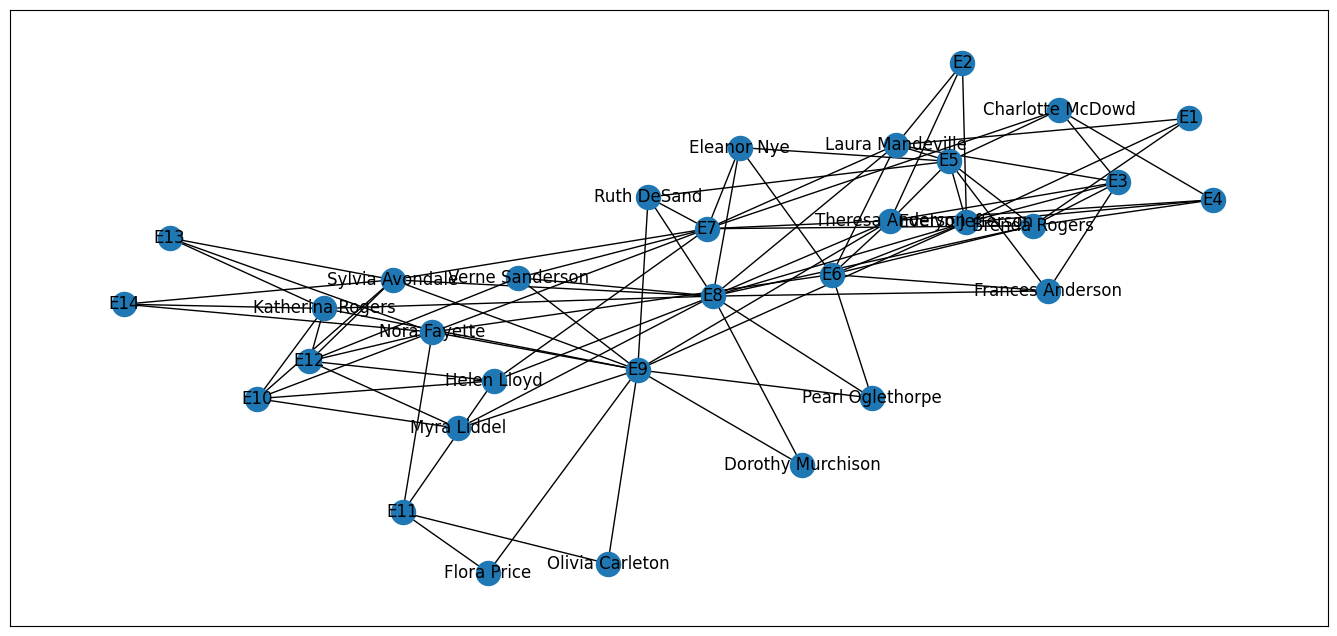

In [24]:
plt.figure(figsize=(17,8))
nx.draw_networkx(G)


# collapses a two-mode graph into a one-mode graph


Overall, this function collapses a two-mode graph into a one-mode graph based on the specified mode, extracts the largest connected component, calculates weights for the edges, visualizes the graph, and returns the resulting graph

In [25]:
#Weighted Projected Graph Conversion

def graphconvert(G, by):
    '''Collapse 2-mode to 1-mode with weighted edges'''

    newNet = bi.weighted_projected_graph(G, by, ratio=False)
    largest_component = max(nx.connected_components(newNet), key=len)
    newNet = newNet.subgraph(largest_component)

    print("Graph Information:")
    print("Number of nodes:", newNet.number_of_nodes())
    print("Number of edges:", newNet.number_of_edges())

    average_degree = sum(dict(newNet.degree()).values()) / newNet.number_of_nodes()
    print("Average Degree:", average_degree)

    weights = [math.log(float(edata['weight'])) for f, t, edata in newNet.edges(data=True)]
    plt.figure(figsize=(17, 8))
    nx.draw_networkx(newNet, width=weights, edge_color=weights)

    return newNet



### Summary Stats

In [26]:


def getStats(G):
    '''get basic information about graph'''

    d = {}
    d['center'] = nx.center(G)
    d['diameter'] = nx.diameter(G)
    d['radius'] = nx.radius(G)
    d['degrees'] = sorted(dict(G.degree()).items(), key=lambda kv: (-kv[1], kv[0]))
    d['betweenness'] = sorted(nx.betweenness_centrality(G).items(), key=lambda kv: (-kv[1], kv[0]))
    d['cliques'] = list(nx.find_cliques(G))

    def create_hc(G):
        """Creates hierarchical cluster of graph G from distance matrix"""
        labels = list(G.nodes())
        path_length = nx.all_pairs_shortest_path_length(G)
        distances = np.zeros((len(G), len(G)))
        i = 0
        for u, p in path_length:
            j = 0
            for v, d in p.items():
                distances[i][j] = d
                distances[j][i] = d
                if i == j:
                    distances[i][j] = 0
                j += 1
            i += 1
        # Create hierarchical cluster
        Y = distance.squareform(distances)
        Z = hierarchy.complete(Y)  # Creates HC using farthest point linkage
        # This partition selection is arbitrary, for illustrative purposes
        membership = list(hierarchy.fcluster(Z, t=1.15))
        # Create collection of lists for blockmodel
        partition = defaultdict(list)
        for n, p in zip(list(range(len(G))), membership):
            partition[p].append(labels[n])
        return list(partition.values())

    d["hierarchicalclusters"] = create_hc(G)

    return d


### Study One Mode Network - Women

Graph Information:
Number of nodes: 18
Number of edges: 139
Average Degree: 15.444444444444445


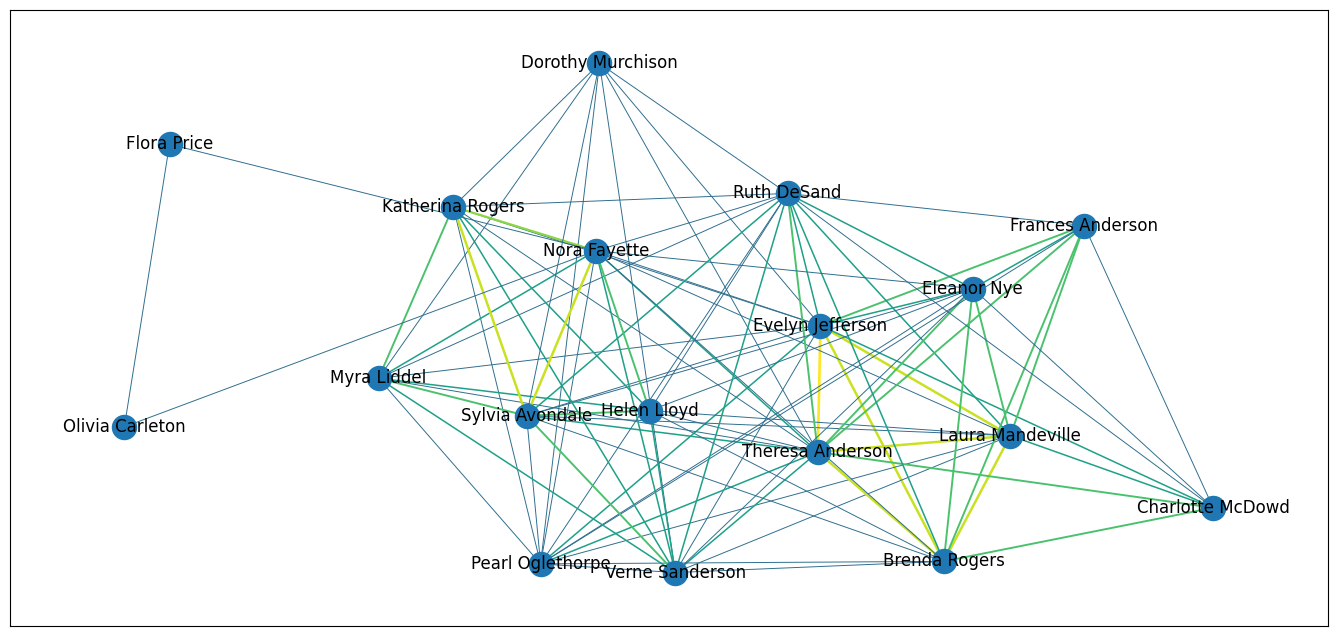

In [27]:
wNet = graphconvert(G, women)

In [28]:
getStats(wNet)

{'center': ['Evelyn Jefferson',
  'Theresa Anderson',
  'Ruth DeSand',
  'Verne Sanderson',
  'Sylvia Avondale',
  'Nora Fayette',
  'Helen Lloyd'],
 'diameter': 2,
 'radius': 1,
 'degrees': [('Evelyn Jefferson', 17),
  ('Helen Lloyd', 17),
  ('Nora Fayette', 17),
  ('Ruth DeSand', 17),
  ('Sylvia Avondale', 17),
  ('Theresa Anderson', 17),
  ('Verne Sanderson', 17),
  ('Dorothy Murchison', 16),
  ('Katherina Rogers', 16),
  ('Myra Liddel', 16),
  ('Pearl Oglethorpe', 16),
  ('Brenda Rogers', 15),
  ('Eleanor Nye', 15),
  ('Frances Anderson', 15),
  ('Laura Mandeville', 15),
  ('Flora Price', 12),
  ('Olivia Carleton', 12),
  ('Charlotte McDowd', 11)],
 'betweenness': [('Evelyn Jefferson', 0.010122230710466005),
  ('Helen Lloyd', 0.010122230710466005),
  ('Nora Fayette', 0.010122230710466005),
  ('Ruth DeSand', 0.010122230710466005),
  ('Sylvia Avondale', 0.010122230710466005),
  ('Theresa Anderson', 0.010122230710466005),
  ('Verne Sanderson', 0.010122230710466005),
  ('Dorothy Murchi


### Study One Mode Network - Events

Graph Information:
Number of nodes: 14
Number of edges: 66
Average Degree: 9.428571428571429


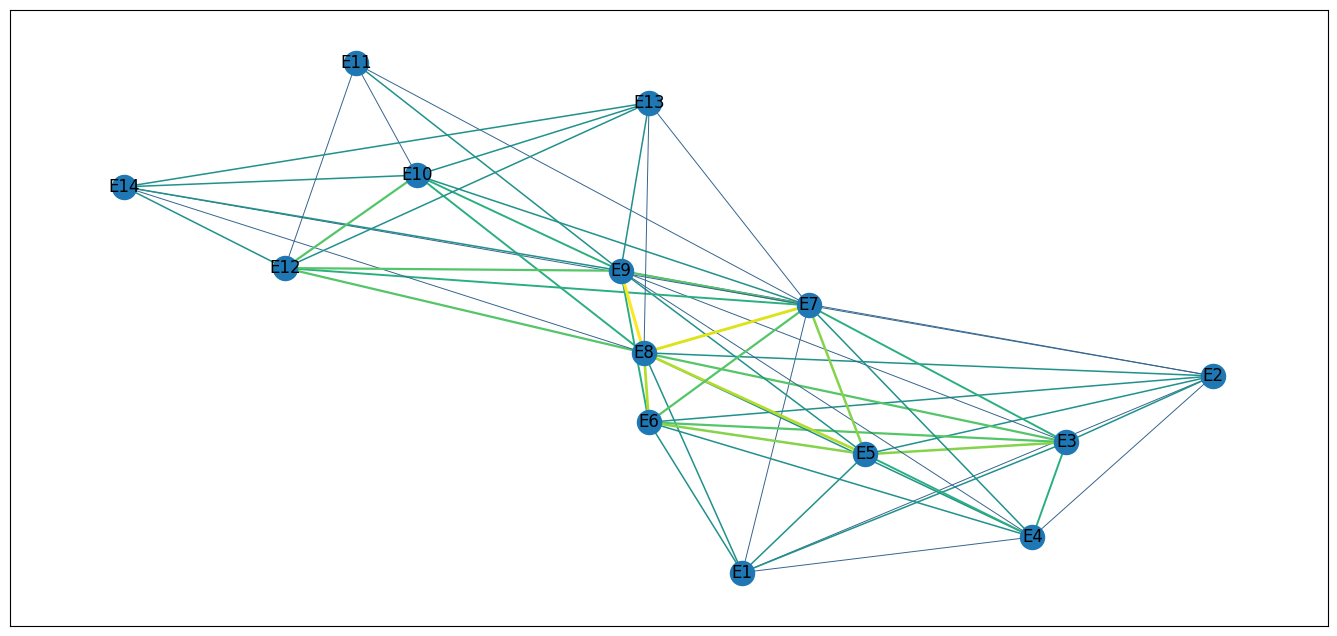

In [29]:
eNet = graphconvert(G, events)

In [30]:
getStats(eNet)

{'center': ['E6', 'E7', 'E8', 'E9'],
 'diameter': 2,
 'radius': 1,
 'degrees': [('E6', 13),
  ('E7', 13),
  ('E8', 13),
  ('E9', 13),
  ('E1', 8),
  ('E10', 8),
  ('E11', 8),
  ('E12', 8),
  ('E13', 8),
  ('E14', 8),
  ('E2', 8),
  ('E3', 8),
  ('E4', 8),
  ('E5', 8)],
 'betweenness': [('E6', 0.08012820512820512),
  ('E7', 0.08012820512820512),
  ('E8', 0.08012820512820512),
  ('E9', 0.08012820512820512),
  ('E1', 0.0),
  ('E10', 0.0),
  ('E11', 0.0),
  ('E12', 0.0),
  ('E13', 0.0),
  ('E14', 0.0),
  ('E2', 0.0),
  ('E3', 0.0),
  ('E4', 0.0),
  ('E5', 0.0)],
 'cliques': [['E6', 'E9', 'E8', 'E7', 'E10', 'E11', 'E14', 'E12', 'E13'],
  ['E6', 'E9', 'E8', 'E7', 'E1', 'E4', 'E3', 'E5', 'E2']],
 'hierarchicalclusters': [['E1',
   'E2',
   'E3',
   'E4',
   'E5',
   'E6',
   'E7',
   'E8',
   'E9',
   'E10',
   'E11',
   'E12',
   'E13',
   'E14']]}

# Conclusion
Women: The women in the graph form a tightly connected network, as indicated by the small diameter of 2 and the presence of cliques and hierarchical clusters. The cliques suggest that subsets of women are highly interconnected, while the hierarchical clusters imply the existence of distinct groups within the network. The women also have high degrees, with most of them having 17 connections. This indicates a relatively equal level of social interaction and engagement among the women.

Social Events: The social events also form a connected network, albeit with a slightly larger diameter of 2. The events E6, E7, E8, and E9 play central roles in the event network, as they have high degrees and betweenness centrality. These events serve as important bridges between other events, suggesting that they have a significant impact on connecting different social circles. The presence of cliques and hierarchical clusters among the events implies the existence of subgroups or communities within the event network.




Overall, the combined statistics indicate that both the women and social events in the graph are interlinked and play important roles in facilitating social connections. The women interact with each other through attending social events, and certain events serve as key meeting points for different groups of women. The tight interconnections among the women and events demonstrate the social cohesion and interdependence within the network, highlighting the social dynamics and relationships between individuals and social gatherings
